In [103]:
%matplotlib inline

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

Dataset Preprocess includiing bilstm-partial-crf result and pubmedbert basedline result

In [105]:
# Bilstm-partial-crf result 
bilstm_partial_file='data/bilstm-partial-crf.csv'
bilstm_data=pd.read_csv(bilstm_partial_file)
bilstm_data.rename(columns={'removal_method':'entity_removal_method','removal_rate':'entity_removal_rate'},inplace=True)
bilstm_data['number_of_surfaceforms']=0 # 初始化
bilstm_data.loc[bilstm_data['entity_name']=='Disease','number_of_surfaceforms']=4238
bilstm_data.loc[bilstm_data['entity_name']=='CellLine','number_of_surfaceforms']=1419
bilstm_data.loc[bilstm_data['entity_name']=='Species','number_of_surfaceforms']=1567
bilstm_data.loc[bilstm_data['entity_name']=='Chemical','number_of_surfaceforms']=29908
bilstm_data.loc[bilstm_data['entity_name']=='Gene','number_of_surfaceforms']=28109
bilstm_data['number_of_entity_annotations_after_removal']=bilstm_data['number_of_annotations']-bilstm_data['number_of_removal_annotations'] 
bilstm_data['number_of_surfaceforms_after_removal']=bilstm_data['number_of_surfaceforms']-bilstm_data['number_of_removal_surfaceforms'] 

bilstm_data=bilstm_data[bilstm_data['entity_removal_rate']!=0.0][['entity_name','entity_removal_method', 'entity_removal_rate','number_of_annotations','number_of_surfaceforms','number_of_entity_annotations_after_removal','number_of_surfaceforms_after_removal','test_recall','seed']]
bilstm_data['Model']='BiLSTM-Partial-CRF' # 新增列model

In [106]:
# pubemedbert-partial result
file_name=r'data/pubmedbert-partial.csv'
pubmedbert_data=pd.read_csv(file_name)
pubmedbert_data['number_of_surfaceforms']=0 # 初始化
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Disease','number_of_surfaceforms']=4238
pubmedbert_data.loc[pubmedbert_data['entity_name']=='CellLine','number_of_surfaceforms']=1419
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Species','number_of_surfaceforms']=1567
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Chemical','number_of_surfaceforms']=29908
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Gene','number_of_surfaceforms']=28109
pubmedbert_data['number_of_entity_annotations_after_removal']=pubmedbert_data['number_of_annotations']-pubmedbert_data['number_of_removal_annotations'] 
pubmedbert_data['number_of_surfaceforms_after_removal']=pubmedbert_data['number_of_surfaceforms']-pubmedbert_data['number_of_removal_surfaceforms'] 
pubmedbert_data=pubmedbert_data[['entity_name','entity_removal_method', 'entity_removal_rate','number_of_annotations','number_of_surfaceforms','number_of_entity_annotations_after_removal','number_of_surfaceforms_after_removal','test_recall','seed']]
pubmedbert_data['Model']='PubMedBERT'

In [107]:
# partial-eer
file_name=r'data/partial-eer.csv'
eer_data=pd.read_csv(file_name)
# 用到的列：test/test_recall-measure-overall,dataset_reader.removal_algorithm, train_data_path,dataset_reader.removal_rate,要进行统一
eer_data['train_data_path']=eer_data['train_data_path'].str.split('/').str.get(1)
eer_data.rename(columns={'train_data_path':'entity_name','dataset_reader.removal_algorithm':'entity_removal_method','dataset_reader.removal_rate':'entity_removal_rate',"test/test_recall-overall":"test_recall","random_seed":"seed"},inplace=True)
eer_data=eer_data[['entity_name','entity_removal_method', 'entity_removal_rate','test_recall',"seed"]]
eer_data['Model']='EER-PubMedBERT'

In [108]:
# My model result
file_name=r'data/gene_chemical_cellline_species.csv'
mymodel_data1=pd.read_csv(file_name)
file_name=r'data/disease_7.csv'
mymodel_data2=pd.read_csv(file_name)

mymodel_data=pd.concat([mymodel_data1,mymodel_data2],axis=0)
# file_name=r'data/bond-partial-crf.csv'
# mymodel_data1=pd.read_csv(file_name)
# file_name=r'data/bond-partial-crf-2.csv'
# mymodel_data2=pd.read_csv(file_name)
# mymodel_data=pd.concat([mymodel_data1,mymodel_data2],axis=0)

In [109]:

mymodel_data=mymodel_data[['entity_name','entity_removal_method', 'entity_removal_rate','test_recall','seed']]
mymodel_data['Model']='TS-PubMedBERT-Partial-CRF'

In [110]:
eer_data.entity_name.unique()

array(['Chemical', 'Disease', 'Gene', 'Species', 'CellLine'], dtype=object)

In [111]:
eer_data.columns

Index(['entity_name', 'entity_removal_method', 'entity_removal_rate',
       'test_recall', 'seed', 'Model'],
      dtype='object')

In [112]:
# Bilstm-partial-crf  and pubemedbert-partial result combination
all_baselines=pd.concat([bilstm_data,pubmedbert_data,eer_data,mymodel_data],ignore_index=True)
all_baselines.loc[all_baselines[all_baselines['entity_removal_method']=='remove_annotation_ranomly'].index,'entity_removal_method']='remove_annotations_randomly' # 把remove_annotation_ranomly更改为remove_annotations_randomly

In [113]:
all_baselines['seed'].value_counts()

42    900
10    180
30    180
40    180
20    180
0     180
Name: seed, dtype: int64

In [114]:
# upperbond file process
upperbond_file='data/pubmedbert-upperbond.csv'
upperbond=pd.read_csv(upperbond_file)

In [115]:
upperbond.columns

Index(['Name', 'test_f1', 'entity_name', 'do_remove_entity', 'best_dev_f1',
       'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'adam_epsilon', 'cache_dir', 'cache_dir_name', 'config_name',
       'current_iteration', 'data_dir', 'dev_file', 'dev_instances', 'device',
       'do_eval', 'do_lower_case', 'do_predict', 'do_train',
       'eval_all_checkpoints', 'evaluate_during_training', 'fp16',
       'fp16_opt_level', 'gradient_accumulation_steps', 'integration_method',
       'iteration_time', 'label_index', 'labels', 'learning_rate', 'lexicon',
       'lexicon_embeds_size', 'load_big_file', 'local_rank', 'logging_steps',
       'max_grad_norm', 'max_seq_length', 'max_steps', 'model_name_or_path',
       'model_type', 'n_gpu', 'no_cuda', 'not_use_best_model',
       'num_train_epochs', 'number_of_annotations',
       'number_of_removal_annotations', 'number_of_removal_surfaceforms',
       'output_dir', 'overwrite_cache', 'overwrite_output_dir',
       'per_

In [116]:
# Dataset info
bilstm_data.head()
bilstm_data.info()
pubmedbert_data.head()
pubmedbert_data.info()
all_baselines.head()
all_baselines.info()
all_baselines['entity_removal_method'].value_counts()
upperbond.head()
upperbond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 35 to 484
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity_name                                 450 non-null    object 
 1   entity_removal_method                       450 non-null    object 
 2   entity_removal_rate                         450 non-null    float64
 3   number_of_annotations                       450 non-null    int64  
 4   number_of_surfaceforms                      450 non-null    int64  
 5   number_of_entity_annotations_after_removal  450 non-null    int64  
 6   number_of_surfaceforms_after_removal        450 non-null    int64  
 7   test_recall                                 450 non-null    float64
 8   seed                                        450 non-null    int64  
 9   Model                                       450 non-null    object 
dtypes: float64(2)

In [117]:
all_baselines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity_name                                 1800 non-null   object 
 1   entity_removal_method                       1800 non-null   object 
 2   entity_removal_rate                         1800 non-null   float64
 3   number_of_annotations                       900 non-null    float64
 4   number_of_surfaceforms                      900 non-null    float64
 5   number_of_entity_annotations_after_removal  900 non-null    float64
 6   number_of_surfaceforms_after_removal        900 non-null    float64
 7   test_recall                                 1800 non-null   float64
 8   seed                                        1800 non-null   int64  
 9   Model                                       1800 non-null   object 
dtypes: float64(6

In [118]:
all_baselines.to_csv('recall_result_whole.csv',index=False)

In [119]:
all_baselines.groupby(by=['entity_name','entity_removal_method','entity_removal_rate','Model']).mean()['test_recall'].to_csv('results/model_test_recall.csv')

In [120]:
all_baselines.groupby(by=['entity_name','entity_removal_rate','Model']).mean()['test_recall'].to_csv('results/model_test_recall_for_removal_rate.csv')

In [121]:
all_baselines.groupby(by=['entity_name','entity_removal_method','Model']).mean()['test_recall'].to_csv('results/model_test_recall_for_removal_method.csv')

In [122]:
all_baselines.groupby(by=['entity_name','Model']).mean()['test_recall'].to_csv('results/model_recall_average.csv')

In [123]:
all_baselines_max=all_baselines.groupby(by=['entity_name','entity_removal_method','entity_removal_rate','Model'],as_index=False).max()
all_baselines_max

,entity_name,entity_removal_method,entity_removal_rate,Model,number_of_annotations,number_of_surfaceforms,number_of_entity_annotations_after_removal,number_of_surfaceforms_after_removal,test_recall,seed
0,CellLine,remove_annotations_randomly,0.1,BiLSTM-Partial-CRF,2500.0,1419.0,2250.0,1227.0,0.658654,42
1,CellLine,remove_annotations_randomly,0.1,EER-PubMedBERT,NaN,NaN,NaN,NaN,0.829719,40
2,CellLine,remove_annotations_randomly,0.1,PubMedBERT,2500.0,1419.0,2250.0,1225.0,0.700402,42
3,CellLine,remove_annotations_randomly,0.1,TS-PubMedBERT-Partial-CRF,NaN,NaN,NaN,NaN,0.859438,40
4,CellLine,remove_annotations_randomly,0.2,BiLSTM-Partial-CRF,2500.0,1419.0,2000.0,1061.0,0.644231,42
...,...,...,...,...,...,...,...,...,...,...
355,Species,remove_surfaceforms_randomly,0.8,TS-PubMedBERT-Partial-CRF,NaN,NaN,NaN,NaN,0.833565,40
356,Species,remove_surfaceforms_randomly,0.9,BiLSTM-Partial-CRF,5290.0,1567.0,577.0,508.0,0.172605,42
357,Species,remove_surfaceforms_randomly,0.9,EER-PubMedBERT,NaN,NaN,NaN,NaN,0.621518,40
358,Species,remove_surfaceforms_randomly,0.9,PubMedBERT,5290.0,1567.0,577.0,499.0,0.134053,42


In [124]:
# set entity type 
Entity_Category_list=['Disease','CellLine','Species','Chemical','Gene']
entity_removal_algorithm_list=['remove_annotations_randomly','remove_surfaceforms_randomly']
removal_algorithm_map={"remove_surfaceforms_randomly":'RSFR',"remove_annotations_randomly":"RAR"}
entity_type_map={"Disease":'Diseases','CellLine':'Cell Lines','Species':'Species','Chemical':'Chemicals','Gene':'Genes'}

# 'Chemical','Species'

In [125]:
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
len(category_algorithm_combination)

10

In [126]:
def ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,dataframe):
    entity_upper=max(upperbond[upperbond['entity_name']==Entity_Category].test_recall)
    cur_data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm) &(dataframe['entity_name']==Entity_Category)]
    seaborn.lineplot(ax=ax,data=cur_data,style="Model",markers=True,dashes=False,x='entity_removal_rate',y='test_recall',hue='Model',err_style='band',hue_order=all_baselines['Model'].unique())
    # # number of entity annotations, and number of entity surface forms
    # # 方法二：通过groupby
    # groups=cur_data.groupby(["entity_removal_rate"]).mean()
    # all_removal_rates=cur_data['entity_removal_rate'].unique().tolist()
    # all_number_annotation_list=[round(k) for k in groups['number_of_entity_annotations_after_removal'].tolist()]
    # all_number_surfaceforms_list=[round(k) for k in groups['number_of_surfaceforms_after_removal'].tolist()]
    # # 添加等于0的位置
    # all_removal_rates.insert(0,0.0)
    # all_number_annotation_list.insert(0,cur_data['number_of_annotations'].iloc[0])
    # all_number_surfaceforms_list.insert(0,cur_data['number_of_surfaceforms'].iloc[0])
    # x_ticklabels=['\n'.join([str(kk[0]),str(kk[1])]) for kk in list(zip(all_removal_rates,all_number_annotation_list,all_number_surfaceforms_list))]

    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]
    # 添加水平横线
    ax.axhline(y=entity_upper,color='red',ls='--',lw=2.5)
    ax.legend(loc='lower left',fontsize=20)
    ax.set_xlabel('Entity Removal Rate',fontsize=20)
    ax.set_ylabel('Recall',fontsize=20)
    ax.set_xticks(np.arange(0,1.0,0.1))
    ax.set_yticks(np.arange(0,1.1,0.1))
    # ax.set_xticklabels(labels=x_ticklabels)
    ax.tick_params(axis='x',labelsize=15)
    ax.tick_params(axis='y',labelsize=20)
    ax.set_title(f'Entity Type: {entity_type_map[Entity_Category]}; Entity Removal Scheme: {abbr_algorithm}',fontsize=20)
    # plt.savefig(f"figures/{Entity_Category}_{entity_removal_algorithm}.png")
    # plt.show()

current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

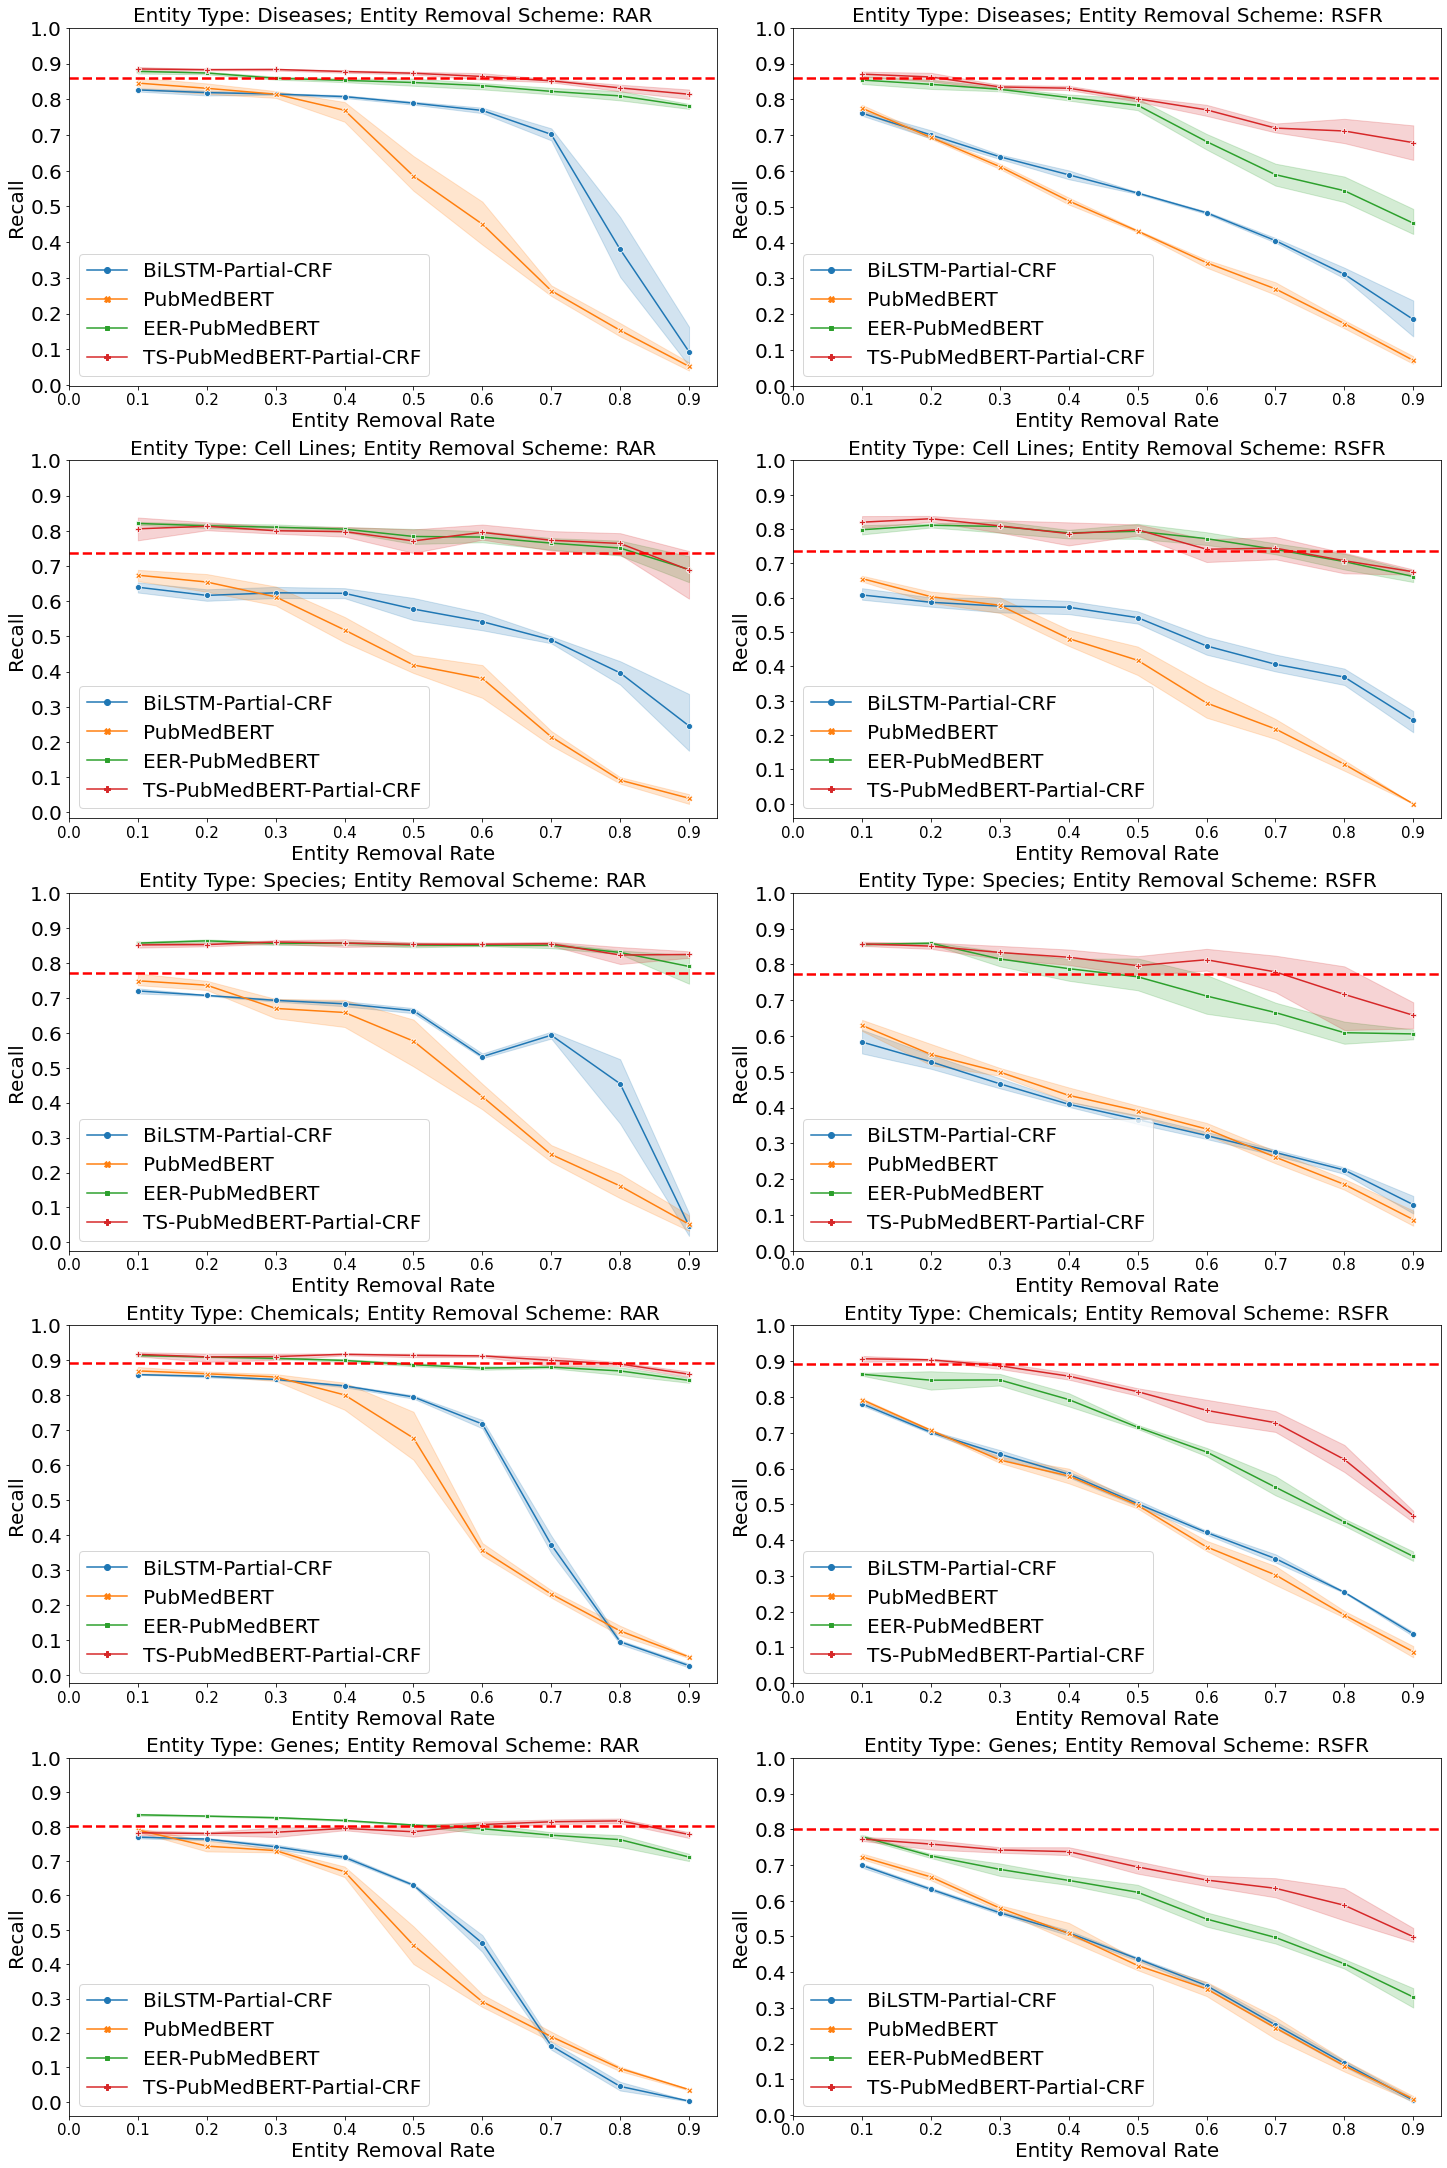

In [127]:
# 创建子图，5行2列，每一行为entity type，每列为entity removal algorithm，横着看就是固定数据集，对比两种随机去除算法，竖着看就是固定随机去除算法，观察每个数据集的情况
fig,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,30),constrained_layout=True)
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[0]
        entity_removal_algorithm=combi[1]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines)
plt.savefig(f"figures/Averarge_recall_combination_5_2.pdf",dpi=1000)


current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

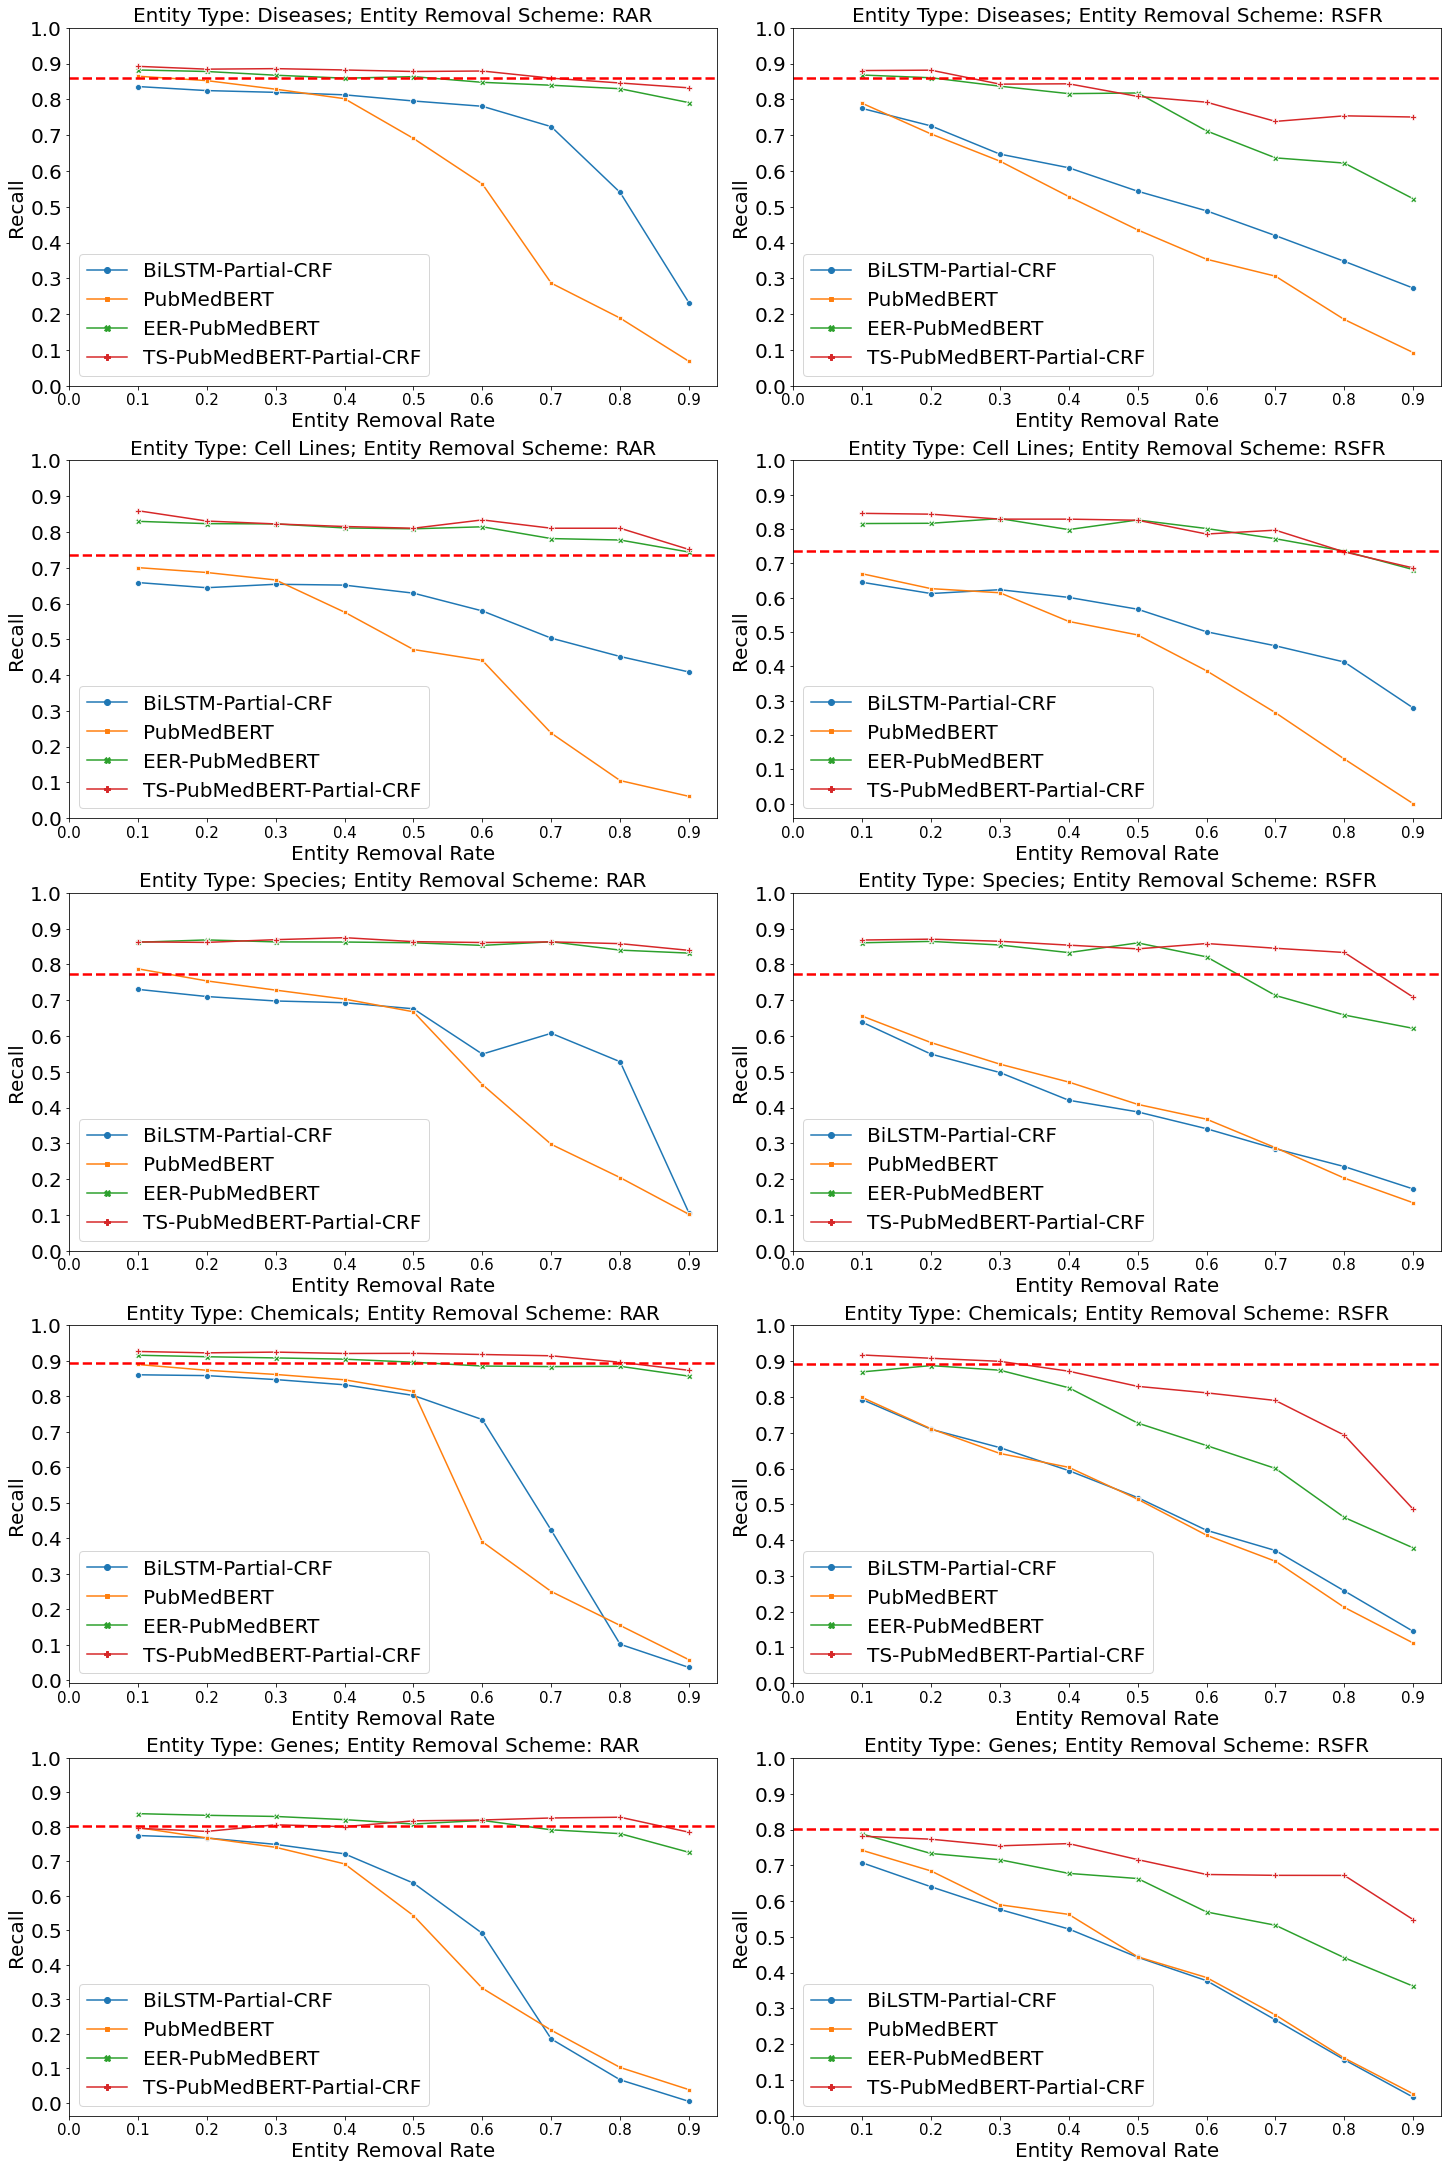

In [128]:
# 创建子图，5行2列，每一行为entity type，每列为entity removal algorithm，横着看就是固定数据集，对比两种随机去除算法，竖着看就是固定随机去除算法，观察每个数据集的情况
fig,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,30),constrained_layout=True)
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[0]
        entity_removal_algorithm=combi[1]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines_max)
plt.savefig(f"figures/Max_recall_combination_5_2.pdf",dpi=1000)

current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

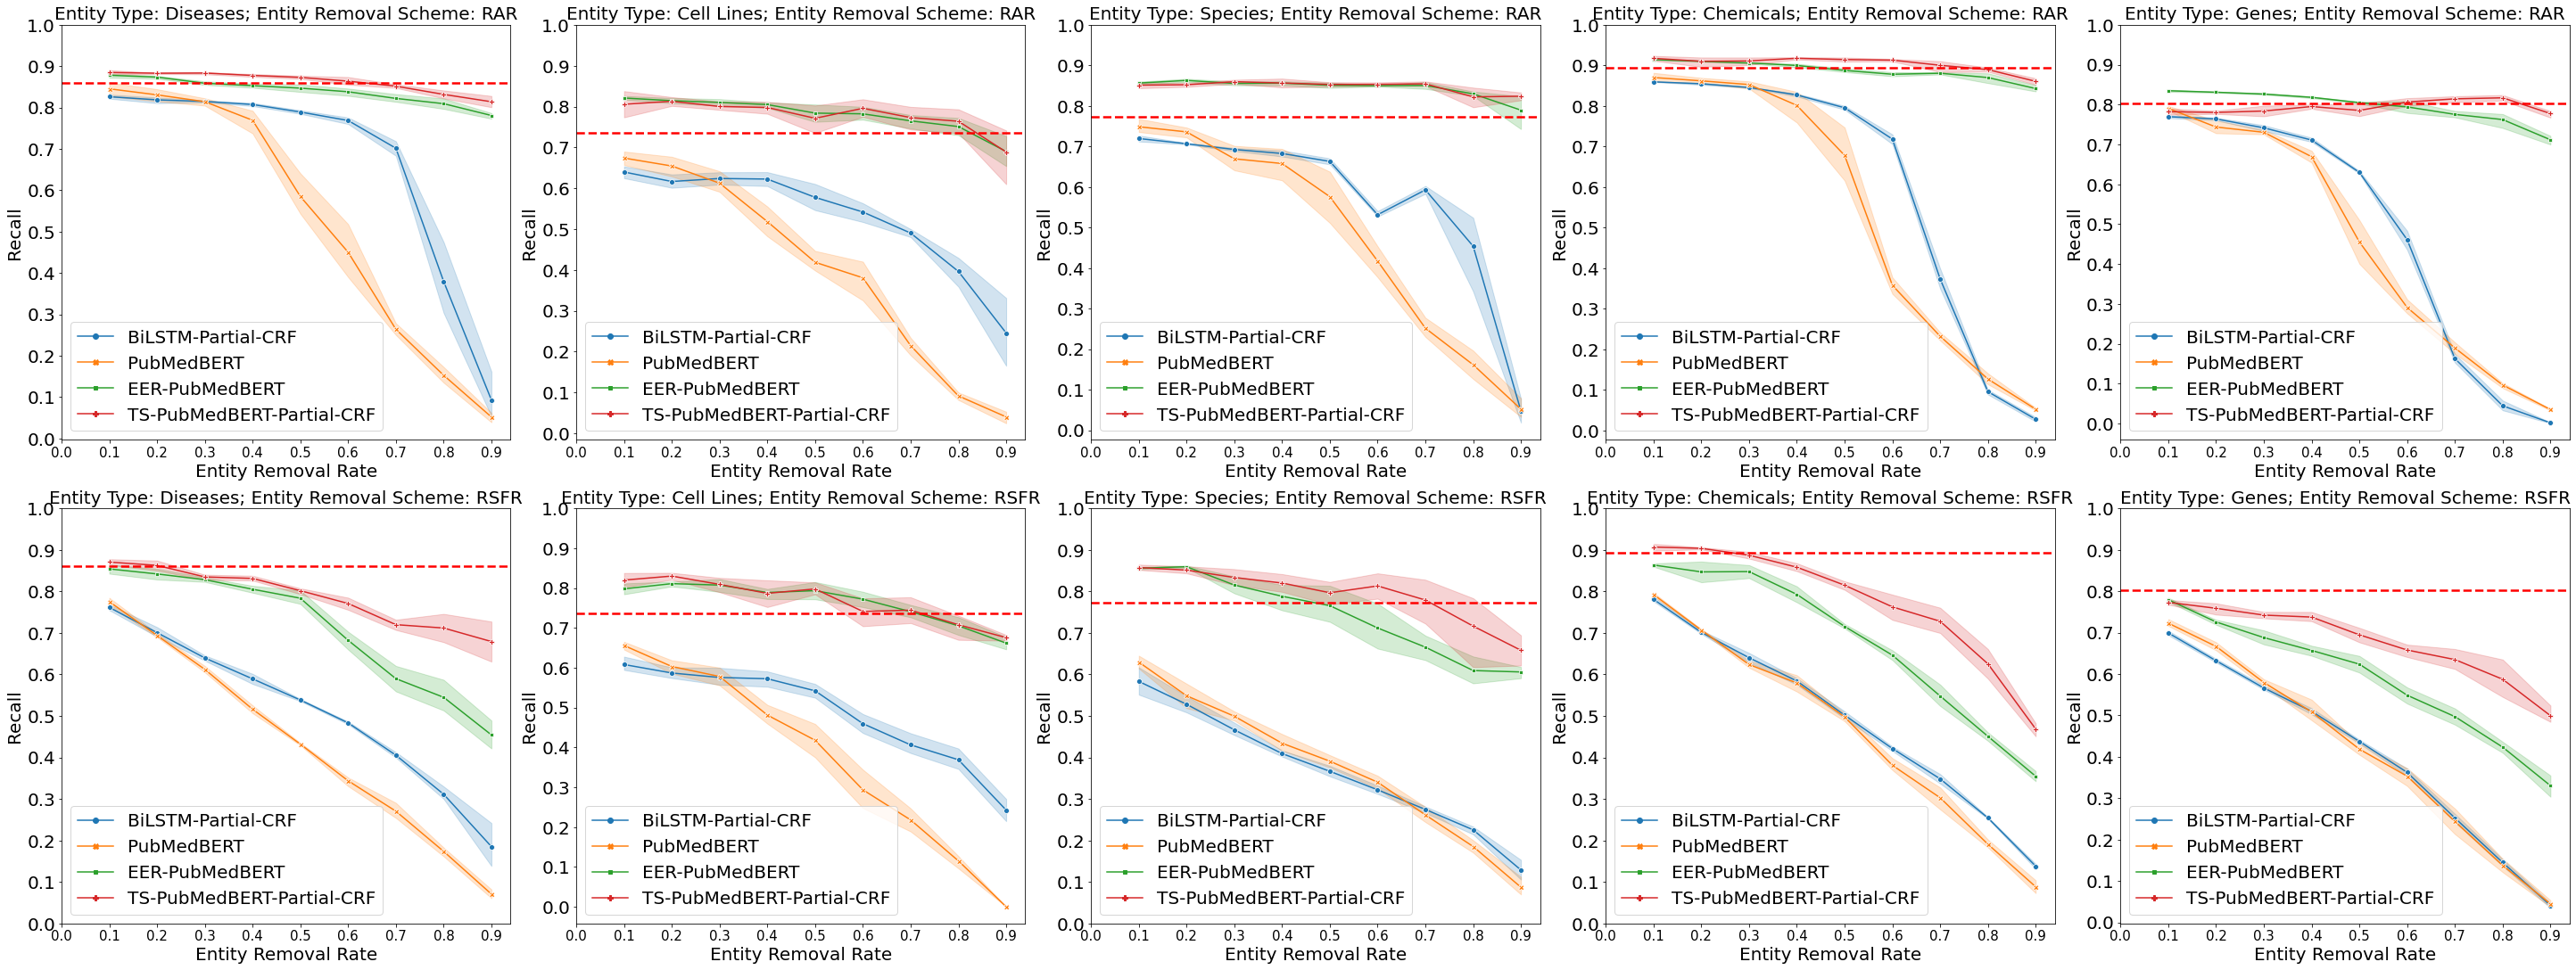

In [129]:
# 创建子图，2行5列，每一行为一个entity removal algorithm在5个entity type上的表现，固定随机去除算法，观察每个数据集的情况
fig,axs=plt.subplots(nrows=2,ncols=5,figsize=(40,15),constrained_layout=True)
category_algorithm_combination=[[entity_removal_algorithm,Entity_Category]  for entity_removal_algorithm in entity_removal_algorithm_list for Entity_Category in Entity_Category_list] # 遍历先后顺序发生改变
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[1]
        entity_removal_algorithm=combi[0]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines)
plt.savefig(f"figures/Average_recall_combination_2_5.pdf",dpi=1000)

current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

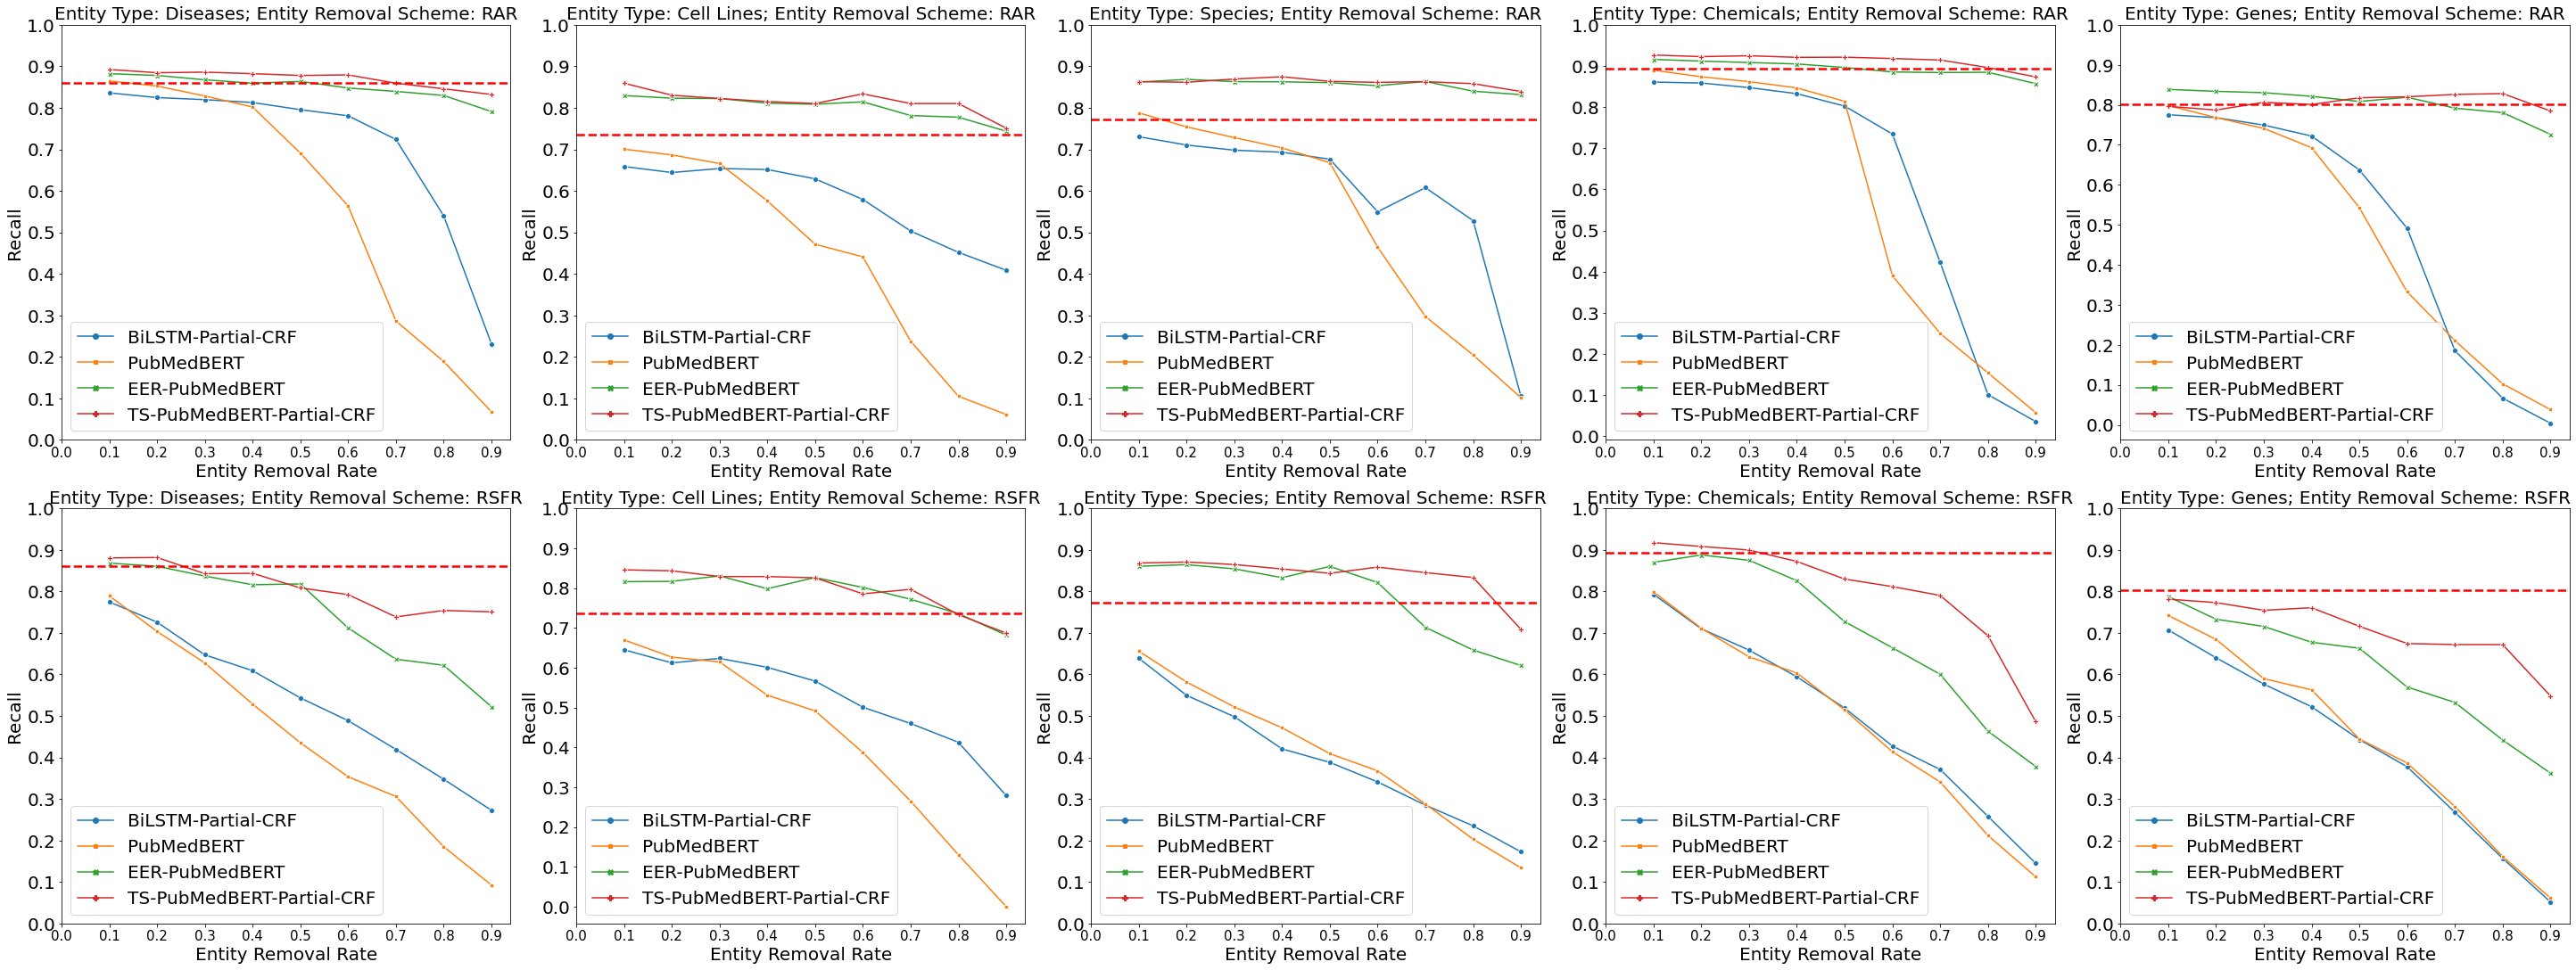

In [130]:
# 创建子图，2行5列，每一行为一个entity removal algorithm在5个entity type上的表现，固定随机去除算法，观察每个数据集的情况
fig,axs=plt.subplots(nrows=2,ncols=5,figsize=(40,15),constrained_layout=True)
category_algorithm_combination=[[entity_removal_algorithm,Entity_Category]  for entity_removal_algorithm in entity_removal_algorithm_list for Entity_Category in Entity_Category_list] # 遍历先后顺序发生改变
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[1]
        entity_removal_algorithm=combi[0]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines_max)
plt.savefig(f"figures/Max_recall_combination_2_5.pdf",dpi=1000)

In [131]:
# 画一幅图
def plot_figure_aggragate_entity_name(entity_removal_algorithm,ax,dataframe):
    seaborn.lineplot(data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm)],style="Model",markers=True,dashes=False,x='entity_removal_rate',y='test_recall',hue='Model',err_style='band',ax=ax,hue_order=all_baselines['Model'].unique())
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]

    ax.legend(loc='lower left')
    ax.set_xlabel('Entity Removal Rate')
    ax.set_ylabel('Recall')
    ax.set_yticks(np.arange(0,1.0,0.1))
    ax.set_title(f'Entity Removal Algorithm: {abbr_algorithm}')



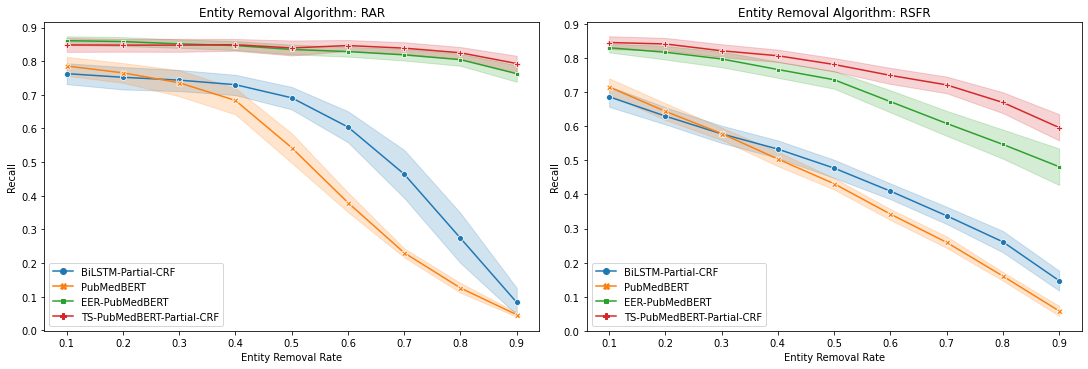

In [132]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),constrained_layout=True)
plot_figure_aggragate_entity_name("remove_surfaceforms_randomly",ax2,all_baselines)
plot_figure_aggragate_entity_name("remove_annotations_randomly",ax1,all_baselines)
plt.savefig(f"figures/Average_Recall_removal_algorithm_subplot.pdf",dpi=1000)
plt.show()

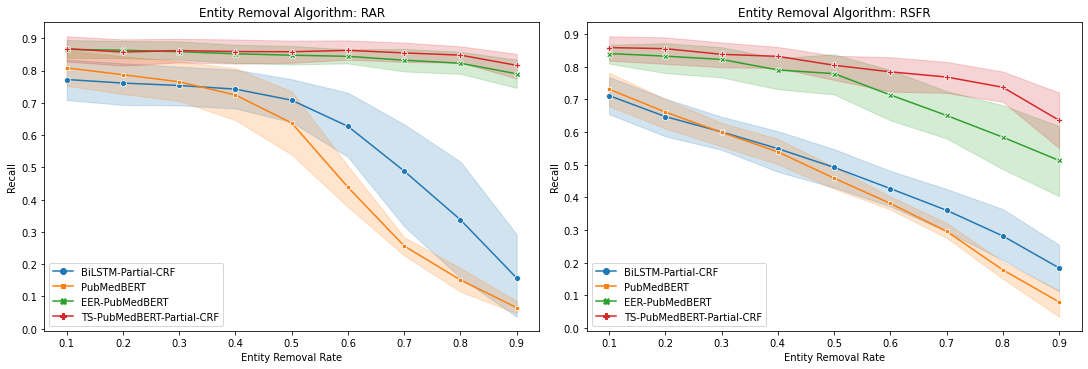

In [133]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),constrained_layout=True)
plot_figure_aggragate_entity_name("remove_surfaceforms_randomly",ax2,all_baselines_max)
plot_figure_aggragate_entity_name("remove_annotations_randomly",ax1,all_baselines_max)
plt.savefig(f"figures/Max_Recall_removal_algorithm_subplot.pdf",dpi=1000)
plt.show()

In [134]:
# 画一幅图
def plot_figure(Entity_Category,entity_removal_algorithm):
    entity_upper=max(upperbond[upperbond['entity_name']==Entity_Category].test_recall)
    seaborn.lineplot(data=all_baselines[(all_baselines['entity_removal_method']==entity_removal_algorithm) &(all_baselines['entity_name']==Entity_Category)],style="Model",markers=True,dashes=False,x='entity_removal_rate',y='test_recall',hue='Model',err_style='band')
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]
    # 添加水平横线
    plt.axhline(y=entity_upper,color='red',ls='--',lw=2.5)
    plt.legend(loc='lower left')
    plt.xlabel('Entity Removal Rate')
    plt.ylabel('Recall')
    plt.yticks(np.arange(0,1.0,0.1))
    plt.title(f'Entity Type: {Entity_Category}; Entity Removal Algorithm: {abbr_algorithm}')
    # plt.savefig(f"figures/{Entity_Category}_{entity_removal_algorithm}.png")
    # plt.show()


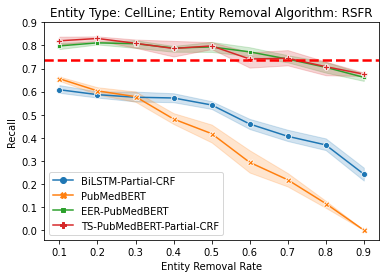

In [135]:
Entity_Category='CellLine'
entity_removal_algorithm='remove_surfaceforms_randomly'
plot_figure(Entity_Category,entity_removal_algorithm)

In [136]:
# for Entity_Category in Entity_Category_list:
#     for entity_removal_algorithm in entity_removal_algorithm_list:
#         print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
#         plot_figure(Entity_Category,entity_removal_algorithm)